## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Загрузка данных MNIST
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
CLASS_COUNT = 10
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

print(y_train.shape)

(60000, 10)


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

model.save_weights('model.weights.h5')

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8881 - loss: 0.3777
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9760 - loss: 0.0789
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9854 - loss: 0.0453
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9907 - loss: 0.0309
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9927 - loss: 0.0242
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9931 - loss: 0.0198
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9941 - loss: 0.0170
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9940 - loss: 0.0168
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9966 - loss: 0.0099
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9964 - loss: 0.0116
Epoch 12/15
469/469 ━━━━━━━━━━

In [ ]:
#Путь к изображению с цифрой**
img_path = "my_digit.jpg"

#Загрузка изображения в градациях серого и нужном размере
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


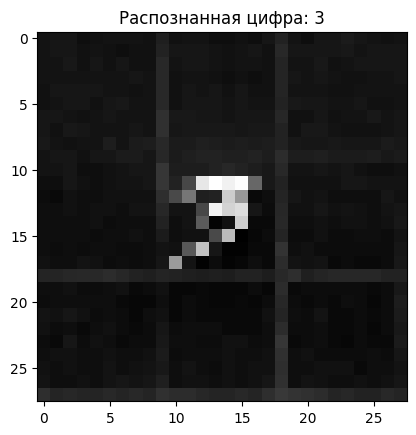

Модель считает, что это цифра: 3


In [ ]:
#Преобразование изображения в массив
img_array = image.img_to_array(img)

#Инверсия
img_array = 255 - img_array

#Решейп массива под формат входных данных (28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

img_array = img_array.reshape(img_array.shape[0], -1)

#Нормализация
img_array = img_array.astype('float32') / 255.0



#Предсказание
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap="gray")
plt.title(f"Распознанная цифра: {predicted_digit}")
plt.show()

print(f"Модель считает, что это цифра: {predicted_digit}")